![title](img/Worki.pptx.png)

![title](img/Worki.pptx(1).png)

![title](img/Worki.pptx(2).png)

<img src="img/vas.jpg" align='center'><br>

# Задача: Научиться предиктить первую покупку и понять что на это влияет?

<img src="img/decision1.jpg" align='center'><br>

# Decision Tree 

<img src="img/DT1.png" align='center'><br>

<img src="img/decision_tree2.gif" align='center'><br>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from matplotlib import pyplot as plt
import seaborn as sns
import shap

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Import Data

In [2]:
main_df = pd.read_csv('data_v3.csv', parse_dates=['create_pay_date', 'job_created_at', 'rec_created_at'])

In [3]:
main_df.head()

,create_pay_date,job_created_at,rec_created_at,diff_from_job_to_pay,rec_sex,cnt_days_company_pay,cnt_days_rect_visit,medium,platform,has_mail_rec,use_platform,paid_organic,network_name,campaign_name,salary_from,salary_to,salary_period,no_experience,watch,parttime,moderation_time_min,cnt_cand_has_disc,cnt_unread_apppl,cnt_short_apppl,cnt_all_apppl,cnt_cand_have_mail,cnt_cand_no_mail,cnt_cand_male,cnt_cand_female,cnt_cand_rus,cnt_cand_not_rus,cnt_cand_no_nat,days_job_apply,cnt_calls,cnt_emarsys_mails,cnt_amo_mails,y,njobs,city,region,profession
0,2019-01-10 17:45:37.944248,2019-01-10 17:41:13.798347,2019-01-09 13:47:45.810412,0,1.0,1.0,2.0,cpc,web,True,web only,Paid Traffic,yandex,radar_yd_s_msc_general,35000.0,40000.0,2.0,True,False,True,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,3,Санкт-Петербург,Санкт-Петербург,менеджер по обслуживанию
1,2019-08-16 14:38:03.273872,2019-08-16 14:35:40.054771,2019-08-16 14:33:27.174772,0,0.0,0.0,1.0,no medium,mobile,False,mobile only,Organic,Organic,no campaign name,NaN,NaN,2.0,False,False,False,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,учитель биологии
2,2019-04-17 12:19:00.681664,2019-04-13 20:49:03.379884,2019-04-13 20:45:17.443516,3,1.0,4.0,5.0,cpc,web,True,web and mobile,Paid Traffic,yandex,radar_yd_s_spb_general_B,35000.0,NaN,2.0,False,False,False,0.0,15.0,32.0,0.0,35.0,8.0,27.0,21.0,13.0,17.0,18.0,0.0,0.002750,0.0,0.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,работник торгового зала
3,2019-05-31 11:20:12.939523,2019-05-25 16:20:06.940903,2019-05-25 16:12:54.031464,5,0.0,6.0,6.0,cpc,web,True,web only,Paid Traffic,yandex,worki_yd_s_spb_okolo,70000.0,110000.0,2.0,False,False,False,16.0,2.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,3.0,1.0,0.0,0.870255,0.0,2.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,мастер по маникюру
4,2019-08-08 13:12:03.502506,2019-08-05 14:08:30.982272,2019-08-05 14:02:53.180557,2,0.0,3.0,4.0,organic,web,True,web only,Organic,google,(not set),NaN,40000.0,2.0,False,False,False,1.0,2.0,0.0,0.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,0.0,0.884097,0.0,2.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,швея


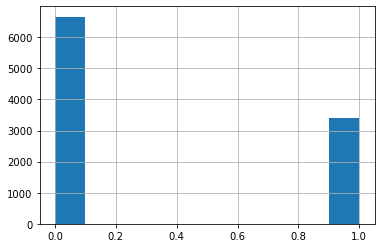

In [4]:
main_df.y.hist();

## Metrics

Confusion matrix (матрица ошибок).

<img src="img/matrix.png" align='center'><br>

Accuracy (точность)

<img src="img/accuracy.png" align='center'><br>

Precision (Точность).

<img src="img/precision.png" align='center'><br>

Recall (Полнота)

<img src="img/recall.png" align='center'><br>

F1 Score

<img src="img/f1.png" align='center'><br>

# Data pre-processing

Date features

In [5]:
main_df.create_pay_date.describe()

count                          10072
unique                         10072
top       2019-06-13 16:27:40.508768
freq                               1
first     2019-01-01 14:38:44.246958
last      2019-09-18 13:59:50.984758
Name: create_pay_date, dtype: object

In [6]:
main_df['pay_day_week'] = main_df['create_pay_date'].dt.weekday
main_df['job_day_week'] = main_df['job_created_at'].dt.weekday

main_df['pay_month'] = main_df['create_pay_date'].dt.month
main_df['job_month'] = main_df['job_created_at'].dt.month


In [7]:
main_df.head()

,create_pay_date,job_created_at,rec_created_at,diff_from_job_to_pay,rec_sex,cnt_days_company_pay,cnt_days_rect_visit,medium,platform,has_mail_rec,use_platform,paid_organic,network_name,campaign_name,salary_from,salary_to,salary_period,no_experience,watch,parttime,moderation_time_min,cnt_cand_has_disc,cnt_unread_apppl,cnt_short_apppl,cnt_all_apppl,cnt_cand_have_mail,cnt_cand_no_mail,cnt_cand_male,cnt_cand_female,cnt_cand_rus,cnt_cand_not_rus,cnt_cand_no_nat,days_job_apply,cnt_calls,cnt_emarsys_mails,cnt_amo_mails,y,njobs,city,region,profession,pay_day_week,job_day_week,pay_month,job_month
0,2019-01-10 17:45:37.944248,2019-01-10 17:41:13.798347,2019-01-09 13:47:45.810412,0,1.0,1.0,2.0,cpc,web,True,web only,Paid Traffic,yandex,radar_yd_s_msc_general,35000.0,40000.0,2.0,True,False,True,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,3,Санкт-Петербург,Санкт-Петербург,менеджер по обслуживанию,3,3,1,1
1,2019-08-16 14:38:03.273872,2019-08-16 14:35:40.054771,2019-08-16 14:33:27.174772,0,0.0,0.0,1.0,no medium,mobile,False,mobile only,Organic,Organic,no campaign name,NaN,NaN,2.0,False,False,False,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,учитель биологии,4,4,8,8
2,2019-04-17 12:19:00.681664,2019-04-13 20:49:03.379884,2019-04-13 20:45:17.443516,3,1.0,4.0,5.0,cpc,web,True,web and mobile,Paid Traffic,yandex,radar_yd_s_spb_general_B,35000.0,NaN,2.0,False,False,False,0.0,15.0,32.0,0.0,35.0,8.0,27.0,21.0,13.0,17.0,18.0,0.0,0.002750,0.0,0.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,работник торгового зала,2,5,4,4
3,2019-05-31 11:20:12.939523,2019-05-25 16:20:06.940903,2019-05-25 16:12:54.031464,5,0.0,6.0,6.0,cpc,web,True,web only,Paid Traffic,yandex,worki_yd_s_spb_okolo,70000.0,110000.0,2.0,False,False,False,16.0,2.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,3.0,1.0,0.0,0.870255,0.0,2.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,мастер по маникюру,4,5,5,5
4,2019-08-08 13:12:03.502506,2019-08-05 14:08:30.982272,2019-08-05 14:02:53.180557,2,0.0,3.0,4.0,organic,web,True,web only,Organic,google,(not set),NaN,40000.0,2.0,False,False,False,1.0,2.0,0.0,0.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,0.0,0.884097,0.0,2.0,0.0,1,1,Санкт-Петербург,Санкт-Петербург,швея,3,0,8,8


In [8]:
main_df = main_df.drop(['create_pay_date', 'job_created_at', 'rec_created_at'], axis = 1)

Categorical features

![title](img/encoding.jpg)

Label Encode

In [9]:
le_medium = preprocessing.LabelEncoder()
le_platform = preprocessing.LabelEncoder()
le_use_platform = preprocessing.LabelEncoder()
le_paid_organic = preprocessing.LabelEncoder()
le_network_name = preprocessing.LabelEncoder()
le_campaign_name = preprocessing.LabelEncoder()
le_region = preprocessing.LabelEncoder()
le_city = preprocessing.LabelEncoder()
le_prof = preprocessing.LabelEncoder()

In [10]:
#Encoder
main_df.loc[~main_df.medium.isna(), 'medium'] = le_medium.fit_transform(main_df.loc[~main_df.medium.isna()].medium)
main_df.loc[~main_df.platform.isna(), 'platform'] = le_platform.fit_transform(main_df.loc[~main_df.platform.isna()].platform)
main_df.loc[~main_df.use_platform.isna(), 'use_platform'] = le_use_platform.fit_transform(main_df.loc[~main_df.use_platform.isna()].use_platform)
main_df.loc[~main_df.paid_organic.isna(), 'paid_organic'] = le_paid_organic.fit_transform(main_df.loc[~main_df.paid_organic.isna()].paid_organic)
main_df.loc[~main_df.network_name.isna(), 'network_name'] = le_network_name.fit_transform(main_df.loc[~main_df.network_name.isna()].network_name)
main_df.loc[~main_df.campaign_name.isna(), 'campaign_name'] = le_campaign_name.fit_transform(main_df.loc[~main_df.campaign_name.isna()].campaign_name)
main_df.loc[~main_df.region.isna(), 'region'] = le_region.fit_transform(main_df.loc[~main_df.region.isna()].region)
main_df.loc[~main_df.city.isna(), 'city'] = le_city.fit_transform(main_df.loc[~main_df.city.isna()].city)
main_df.loc[~main_df.profession.isna(), 'profession'] = le_prof.fit_transform(main_df.loc[~main_df.profession.isna()].profession)

#Bool
main_df.loc[~main_df.has_mail_rec.isna(), 'has_mail_rec'] = np.int8(main_df.loc[~main_df.has_mail_rec.isna(), 'has_mail_rec'])
main_df.loc[~main_df.no_experience.isna(), 'no_experience'] = np.int8(main_df.loc[~main_df.no_experience.isna(), 'no_experience'])
main_df.loc[~main_df.watch.isna(), 'watch'] = np.int8(main_df.loc[~main_df.watch.isna(), 'watch'])
main_df.loc[~main_df.parttime.isna(), 'parttime'] = np.int8(main_df.loc[~main_df.parttime.isna(), 'parttime'])

In [12]:
le_region.classes_

array(['Ленинградская область', 'Москва', 'Московская область',
       'Санкт-Петербург'], dtype=object)

In [13]:
le_region.inverse_transform([2])

array(['Московская область'], dtype=object)

In [14]:
main_df.head()

,diff_from_job_to_pay,rec_sex,cnt_days_company_pay,cnt_days_rect_visit,medium,platform,has_mail_rec,use_platform,paid_organic,network_name,campaign_name,salary_from,salary_to,salary_period,no_experience,watch,parttime,moderation_time_min,cnt_cand_has_disc,cnt_unread_apppl,cnt_short_apppl,cnt_all_apppl,cnt_cand_have_mail,cnt_cand_no_mail,cnt_cand_male,cnt_cand_female,cnt_cand_rus,cnt_cand_not_rus,cnt_cand_no_nat,days_job_apply,cnt_calls,cnt_emarsys_mails,cnt_amo_mails,y,njobs,city,region,profession,pay_day_week,job_day_week,pay_month,job_month
0,0,1.0,1.0,2.0,5,1,1,2,2,66,145,35000.0,40000.0,2.0,1,0,1,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,3,123,3,367,3,3,1,1
1,0,0.0,0.0,1.0,12,0,0,0,1,22,112,NaN,NaN,2.0,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,1,123,3,798,4,4,8,8
2,3,1.0,4.0,5.0,5,1,1,1,2,66,164,35000.0,NaN,2.0,0,0,0,0.0,15.0,32.0,0.0,35.0,8.0,27.0,21.0,13.0,17.0,18.0,0.0,0.002750,0.0,0.0,0.0,1,1,123,3,596,2,5,4,4
3,5,0.0,6.0,6.0,5,1,1,2,2,66,206,70000.0,110000.0,2.0,0,0,0,16.0,2.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,3.0,1.0,0.0,0.870255,0.0,2.0,0.0,1,1,123,3,321,4,5,5,5
4,2,0.0,3.0,4.0,13,1,1,2,1,49,0,NaN,40000.0,2.0,0,0,0,1.0,2.0,0.0,0.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,0.0,0.884097,0.0,2.0,0.0,1,1,123,3,829,3,0,8,8


Get share

In [15]:
main_df['rus_cand_share'] = main_df['cnt_cand_rus'].astype(np.float16)/main_df['cnt_all_apppl'].astype(np.float16)
main_df['notrus_cand_share'] = main_df['cnt_cand_not_rus'].astype(np.float16)/main_df['cnt_all_apppl'].astype(np.float16)

main_df['cand_email_share'] = main_df['cnt_cand_have_mail'].astype(np.float16)/main_df['cnt_all_apppl'].astype(np.float16)
main_df['cand_disc_share'] = main_df['cnt_cand_has_disc'].astype(np.float16)/main_df['cnt_all_apppl'].astype(np.float16)

main_df['cand_short_share'] = main_df['cnt_short_apppl'].astype(np.float16)/main_df['cnt_all_apppl'].astype(np.float16)

main_df['unread_appl_share'] = main_df['cnt_unread_apppl'].astype(np.float16)/main_df['cnt_all_apppl'].astype(np.float16)


Deal with nulls

In [16]:
main_df.fillna(-5, inplace = True)

<img src="img/catboost.png" align='center'><br>

<img src="img/fry.jpg" align='center'><br>

<img src="img/boosting.png" align='center'><br>

In [17]:
y = main_df.y
X = main_df.drop(['y'], axis = 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
cat_vars = ['medium', 'platform', 'use_platform', 'paid_organic', 'network_name','region', 'city','profession']

In [20]:
from catboost import CatBoostClassifier, Pool, cv

In [21]:
model = CatBoostClassifier(
    #custom_loss=['F1'],
    eval_metric ='F1',
    random_seed=42,
    logging_level='Silent',
    iterations = 5000,
    early_stopping_rounds=300
)

In [22]:
model.fit(
    X_train, y_train,
    cat_features=cat_vars,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
from eli5 import explain_weights_catboost

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [24]:
explain_weights_catboost(model, top=100)

Weight,Feature
0.1541,diff_from_job_to_pay
0.1463,cnt_days_rect_visit
0.0650,job_day_week
0.0508,cnt_days_company_pay
0.0491,moderation_time_min
0.0485,profession
0.0427,pay_day_week
0.0403,pay_month
0.0390,job_month
0.0355,unread_appl_share


In [25]:
drop_features = ['cnt_cand_no_nat']

In [26]:
model.fit(
    X_train.drop(drop_features, axis = 1), y_train,
    cat_features=cat_vars,
    eval_set=(X_test.drop(drop_features, axis = 1), y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [27]:
X = X.drop(drop_features, axis = 1)
X_test = X_test.drop(drop_features, axis = 1)
X_train = X_train.drop(drop_features, axis = 1)

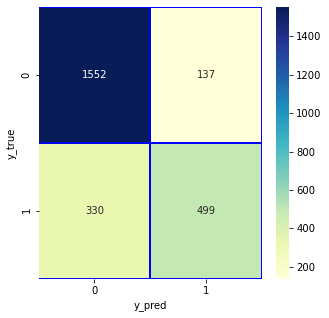

In [28]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,model.predict(X_test))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="blue",fmt=".0f",ax=ax, cmap="YlGnBu")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [29]:
print('Accuracy: ', accuracy_score(y_test,model.predict(X_test)))
print('Precision: ', precision_score(y_test,model.predict(X_test)))
print('Recall: ', recall_score(y_test,model.predict(X_test)))
print('F1 Score: ', f1_score(y_test,model.predict(X_test)))

Accuracy:  0.8145353455123113
Precision:  0.7845911949685535
Recall:  0.6019300361881785
F1 Score:  0.6812286689419795


<img src="img/sowhat.jpg" align='center'><br>

## Shap values

In [30]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


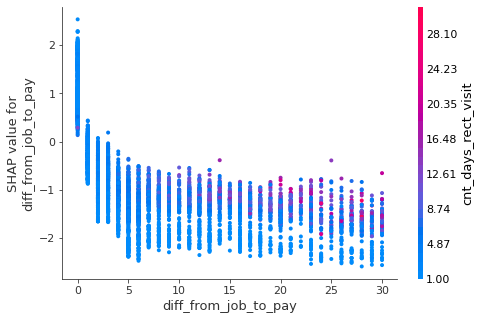

In [31]:
shap.dependence_plot("diff_from_job_to_pay", shap_values, X)

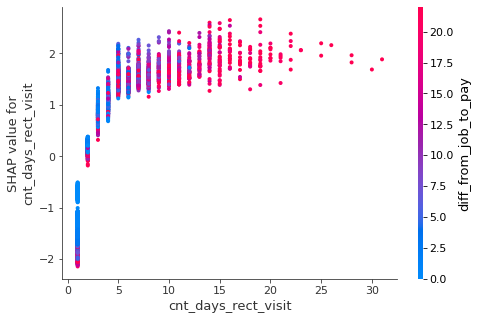

In [32]:
shap.dependence_plot("cnt_days_rect_visit", shap_values, X)

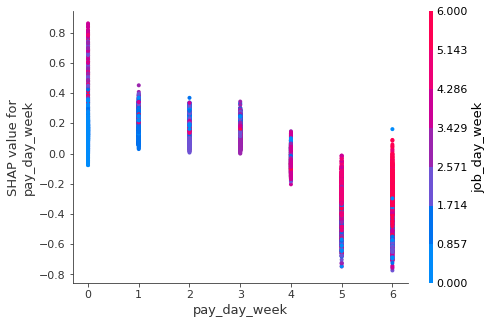

In [33]:
shap.dependence_plot("pay_day_week", shap_values, X)

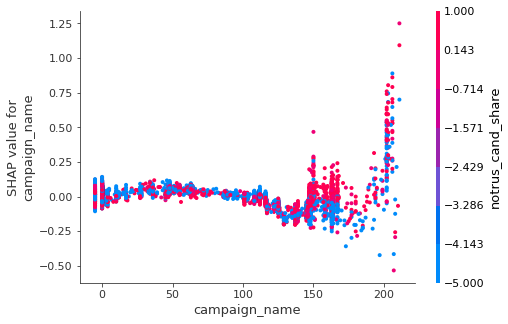

In [34]:
shap.dependence_plot("campaign_name", shap_values, X)

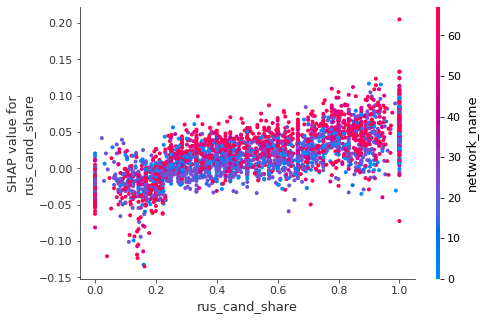

In [35]:
shap_values = explainer.shap_values(X[X.cnt_all_apppl >= 5])
shap.dependence_plot("rus_cand_share", shap_values, X[X.cnt_all_apppl >= 5])

## Marketing emails

<img src="img/Effektivnyi_emeil_marketing.jpg" align='center'><br>

# Задание

https://www.kaggle.com/c/titanic

<img src="img/titanic.jpg" align='center'><br>

<img src="img/fin.jpg" align='center'><br>